In [1]:
#from mpl_toolkits.basemap import Basemap, shiftgrid, cm, addcyclic
import netCDF4 as nc
import numpy as np
import pylab as plt
import iris as iris
import iris.coord_categorisation
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import warnings
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap, shiftgrid, cm, addcyclic
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
def tropical_mean_summertime_cube(cube, mrspec, lat_range, lon_range):
    mrair=28.8
    iris.coord_categorisation.add_season     (cube, coord='time', name='clim_season')
    iris.coord_categorisation.add_season_year(cube, 'time', name='season_year')
    #cube = cube.aggregated_by(['clim_season', 'season_year'], iris.analysis.MEAN)
    #print(cube)
    cube.data = cube.data * mrair/mrspec/1e-12
    cube = cube.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
    cubejja = cube.extract(iris.Constraint(clim_season='djf'))
    cubejja.remove_coord('surface_altitude')
    #print(cubejja)
    cubetmp = cubejja.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)
    return cubetmp

In [3]:
filename = '/scratch/ptg21/netscratch/UM_data/xjjgka.pmk8.nc'
data=iris.load(filename)

/home/ptg21/.conda/envs/iris/lib/python2.7/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [4]:
print(data)

0: mass_concentration_of_clno2_in_air / (1) (time: 12; model_level_number: 60; latitude: 73; longitude: 96)
1: mass_fraction_of_CH2Br2_in_air / (1) (time: 12; model_level_number: 60; latitude: 73; longitude: 96)
2: mass_fraction_of_lumped_Br_in_air / (1) (time: 12; model_level_number: 60; latitude: 73; longitude: 96)
3: mass_fraction_of_CHBr3_in_air / (1) (time: 12; model_level_number: 60; latitude: 73; longitude: 96)
4: mass_concentration_of_brno2_in_air / (1) (time: 12; model_level_number: 60; latitude: 73; longitude: 96)
5: wass_fraction_of_Br2_in_air / (1)   (time: 12; model_level_number: 60; latitude: 73; longitude: 96)
6: mass_fraction_of_atomic_bromine_in_air / (kg kg-1) (time: 12; model_level_number: 60; latitude: 73; longitude: 96)
7: mass_fraction_of_atomic_chlorine_in_air / (kg kg-1) (time: 12; model_level_number: 60; latitude: 73; longitude: 96)
8: mass_fraction_of_bromine_chloride_in_air / (kg kg-1) (time: 12; model_level_number: 60; latitude: 73; longitude: 96)
9: mass_fr

In [5]:
print(data[7])

mass_fraction_of_atomic_chlorine_in_air / (kg kg-1) (time: 12; model_level_number: 60; latitude: 73; longitude: 96)
     Dimension coordinates:
          time                                           x                       -             -              -
          model_level_number                             -                       x             -              -
          latitude                                       -                       -             x              -
          longitude                                      -                       -             -              x
     Auxiliary coordinates:
          forecast_period                                x                       -             -              -
          level_height                                   -                       x             -              -
          sigma                                          -                       x             -              -
     Scalar coordinates:
          forecast_

In [6]:
chbrcl2_name = iris.Constraint(cube_func=lambda cube: cube.var_name == 'mass_fraction_of_toluene_in_air')
chbrcl2 = data.extract(chbrcl2_name)

In [34]:
chbrcl2 = data[0]
ch2br2 = data[1]
totalbr = data[2]
chbr3 = data[3]
brno2=data[4]
br2 = data[5]
br = data[6]
brcl = data[8]
brono2 = data[9]
hbr = data[11]
mebr = data[12]
chbr2cl = data[13]
hobr = data[14]

bro = totalbr -(chbrcl2+ch2br2+chbr3+chbr2cl+mebr+brno2+br+br2+brcl+brono2+hbr+hobr)

In [47]:
mrair = 28.8
lat_range = [-45, 15]
lon_range = [-110,-60]

mrbry = 79.+16.
brysub = totalbr.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
brysub = brysub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrbry/1e-12

mrchbrcl2 = 2*35.5+79+12.+1.
chbrcl2sub = chbrcl2.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
chbrcl2sub = chbrcl2sub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrchbrcl2/1e-12

mrch2br2 = 2*79.+12.+3.
ch2br2sub = ch2br2.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
ch2br2sub = ch2br2sub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrch2br2/1e-12

mrchbr3 = 3*79.+12.+1.
chbr3sub = chbr3.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
chbr3sub = chbr3sub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrchbr3/1e-12

mrbr = 79.
brsub = br.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
brsub = brsub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrbr/1e-12

mrbr2 = 2.*79.
br2sub = br2.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
br2sub = br2sub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrbr/1e-12

mrbrcl = 79. + 35.5
brclsub = brcl.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
brclsub = brcl.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrbrcl/1e-12

mrbrno2 = 79. + 14. + 32.
brno2sub = brno2.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
brno2sub = brno2sub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrbrno2/1e-12

mrbrono2 = 79. + 16. + 14. + 32.
brono2sub = brono2.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
brono2sub = brono2sub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrbrono2/1e-12

mrhbr = 79. + 1.
hbrsub = hbr.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
hbrsub = hbrsub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrhbr/1e-12

mrmebr = 3. + 12. + 79.
mebrsub = mebr.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
mebrsub = mebr.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrmebr/1e-12

mrhobr = 1. + 16. + 79.
hobrsub = hobr.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
hobrsub = hobr.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrhobr/1e-12

mrchbr2cl = 2*79.+1.+12.+35.5
chbr2clsub = chbr2cl.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
chbr2clsub = chbr2clsub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrchbr2cl/1e-12

mrbro = 79.+16.
brosub = bro.intersection(latitude=(lat_range[0],lat_range[1]), longitude=(lon_range[0],lon_range[1]))
brosub = brosub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)*mrair/mrbro/1e-12




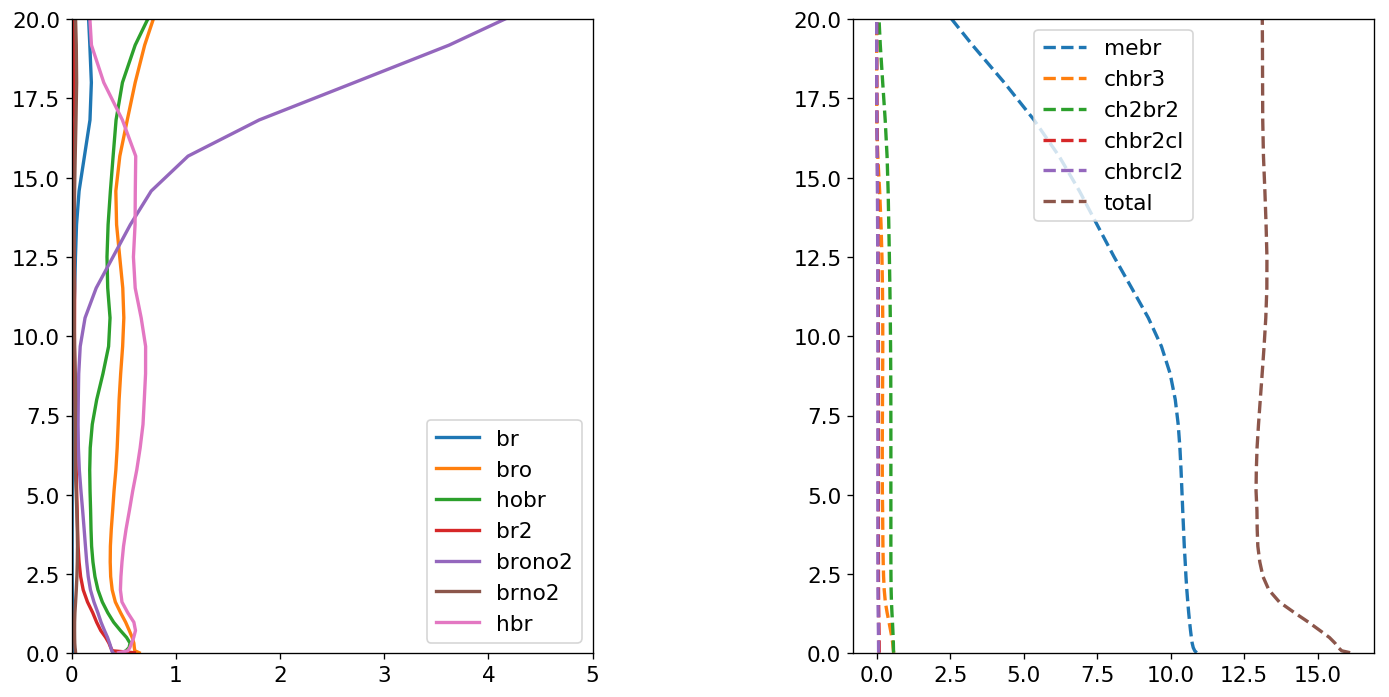

In [48]:
hts=bro.coord('level_height').points
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 

mpl.rc('figure', figsize=(14, 7), facecolor='white', dpi=120)
mpl.rc('figure.subplot', wspace=0.5, hspace=0.3)
mpl.rc('axes', grid=0, titlesize=5)
mpl.rc('axes.formatter', limits=(-2, 5))
mpl.rc('lines', linewidth=2, color='r')
mpl.rc('font', size=13)
plt.clf()
plt.subplot(1,2,1)
plt.plot(brsub.data,hts/1e3, label='br')
plt.plot(brosub.data,hts/1e3, label='bro')
plt.plot(hobrsub.data,hts/1e3, label='hobr')
plt.plot(br2sub.data, hts/1e3, label='br2')
plt.plot(brono2sub.data, hts/1e3, label='brono2')
plt.plot(brno2sub.data, hts/1e3, label='brno2')
plt.plot(hbrsub.data,hts/1e3, label='hbr')
plt.ylim(0,20)
plt.xlim(0,5)
plt.legend()
plt.subplot(1,2,2)
plt.plot(mebrsub.data,hts/1e3, '--',label='mebr')
plt.plot(chbr3sub.data,hts/1e3, '--',label='chbr3')
plt.plot(ch2br2sub.data, hts/1e3, '--', label='ch2br2')
plt.plot(chbr2clsub.data, hts/1e3, '--', label='chbr2cl')
plt.plot(chbrcl2sub.data, hts/1e3, '--', label='chbrcl2')
plt.plot(brysub.data, hts/1e3, '--', label='total')
plt.ylim(0,20)
#plt.xlim(0,25)
plt.legend()
plt.show()


/home/ptg21/.conda/envs/iris/lib/python2.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app


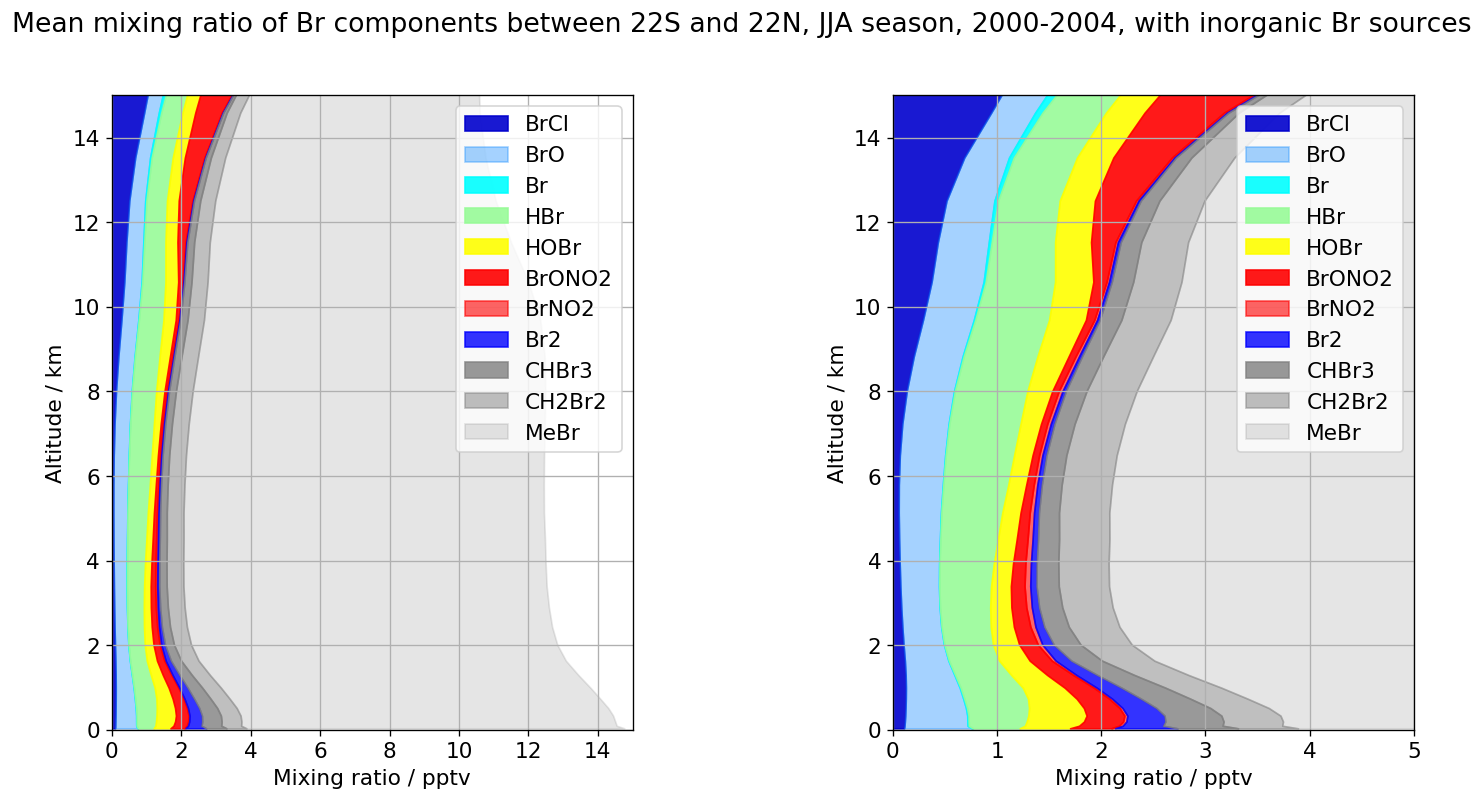

In [66]:
hts=bro.coord('level_height').points
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 

mpl.rc('figure', figsize=(14, 7), facecolor='white', dpi=120)
mpl.rc('figure.subplot', wspace=0.5, hspace=0.3)
mpl.rc('axes', grid=0, titlesize=5)
mpl.rc('axes.formatter', limits=(-2, 5))
mpl.rc('lines', linewidth=2, color='r')
mpl.rc('font', size=13)
#%%

#plt.figure(figsize=(18,9), dpi=200)
plt.hold(True)
plt.clf()
plt.subplot(1,2,1)
plt.fill_betweenx(hts/1e3, np.zeros_like(brsub.data), 
                  brclsub.data, 
                  color='mediumblue', alpha=0.9, label='BrCl')#, hbrsub.data, hobrsub.data)

plt.fill_betweenx(hts/1e3,brclsub.data , 
                  brclsub.data+brosub.data, 
                  color='dodgerblue', alpha=0.4, label='BrO')#, hbrsub.data, hobrsub.data)

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data,
                  brclsub.data+brosub.data+brsub.data, 
                  color='cyan', alpha=0.9, label='Br')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data, 
                  color='palegreen', alpha=0.9, label='HBr')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data, 
                  color='yellow', alpha=0.9, label='HOBr')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data, 
                  color='red', alpha=0.9, label='BrONO2')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data, 
                  color='red', alpha=0.6, label='BrNO2')


plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data, 
                  color='blue', alpha=0.8, label='Br2')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data+chbr3sub.data, 
                  color='gray', alpha=0.8, label='CHBr3')


plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data+chbr3sub.data, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data+chbr3sub.data+ch2br2sub.data, 
                  color='gray', alpha=0.5, label='CH2Br2')


plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data+chbr3sub.data+ch2br2sub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data+chbr3sub.data+ch2br2sub.data+mebrsub.data, 
                  color='gray', alpha=0.2, label='MeBr')

#plt.plot(brysub.data, hts/1e3, '--', label='Total Br')
plt.xlim(0,15.)
plt.ylim(0,15)
plt.xlabel('Mixing ratio / pptv')
plt.ylabel('Altitude / km')
plt.grid(True)
plt.legend()


plt.subplot(1,2,2)
plt.fill_betweenx(hts/1e3, np.zeros_like(brsub.data), 
                  brclsub.data, 
                  color='mediumblue', alpha=0.9, label='BrCl')#, hbrsub.data, hobrsub.data)

plt.fill_betweenx(hts/1e3,brclsub.data , 
                  brclsub.data+brosub.data, 
                  color='dodgerblue', alpha=0.4, label='BrO')#, hbrsub.data, hobrsub.data)

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data,
                  brclsub.data+brosub.data+brsub.data, 
                  color='cyan', alpha=0.9, label='Br')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data, 
                  color='palegreen', alpha=0.9, label='HBr')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data, 
                  color='yellow', alpha=0.9, label='HOBr')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data, 
                  color='red', alpha=0.9, label='BrONO2')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data, 
                  color='red', alpha=0.6, label='BrNO2')


plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data, 
                  color='blue', alpha=0.8, label='Br2')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data+chbr3sub.data, 
                  color='gray', alpha=0.8, label='CHBr3')


plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data+chbr3sub.data, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data+chbr3sub.data+ch2br2sub.data, 
                  color='gray', alpha=0.5, label='CH2Br2')


plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data+chbr3sub.data+ch2br2sub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+brno2sub.data+br2sub.data+chbr3sub.data+ch2br2sub.data+mebrsub.data, 
                  color='gray', alpha=0.2, label='MeBr')


plt.xlim(0,5)
plt.xlabel('Mixing ratio / pptv')
plt.ylabel('Altitude / km')
plt.grid(True)
plt.ylim(0,15.)
plt.legend()
plt.suptitle('Mean mixing ratio of Br components between 22S and 22N, JJA season, 2000-2004, with inorganic Br sources', fontsize=16)
plt.show()

In [67]:
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(14, 14),
                           subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    # x0, x1, y0, y1
    #ax.add_feature(LAND, facecolor='white')
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5, color='gray')
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

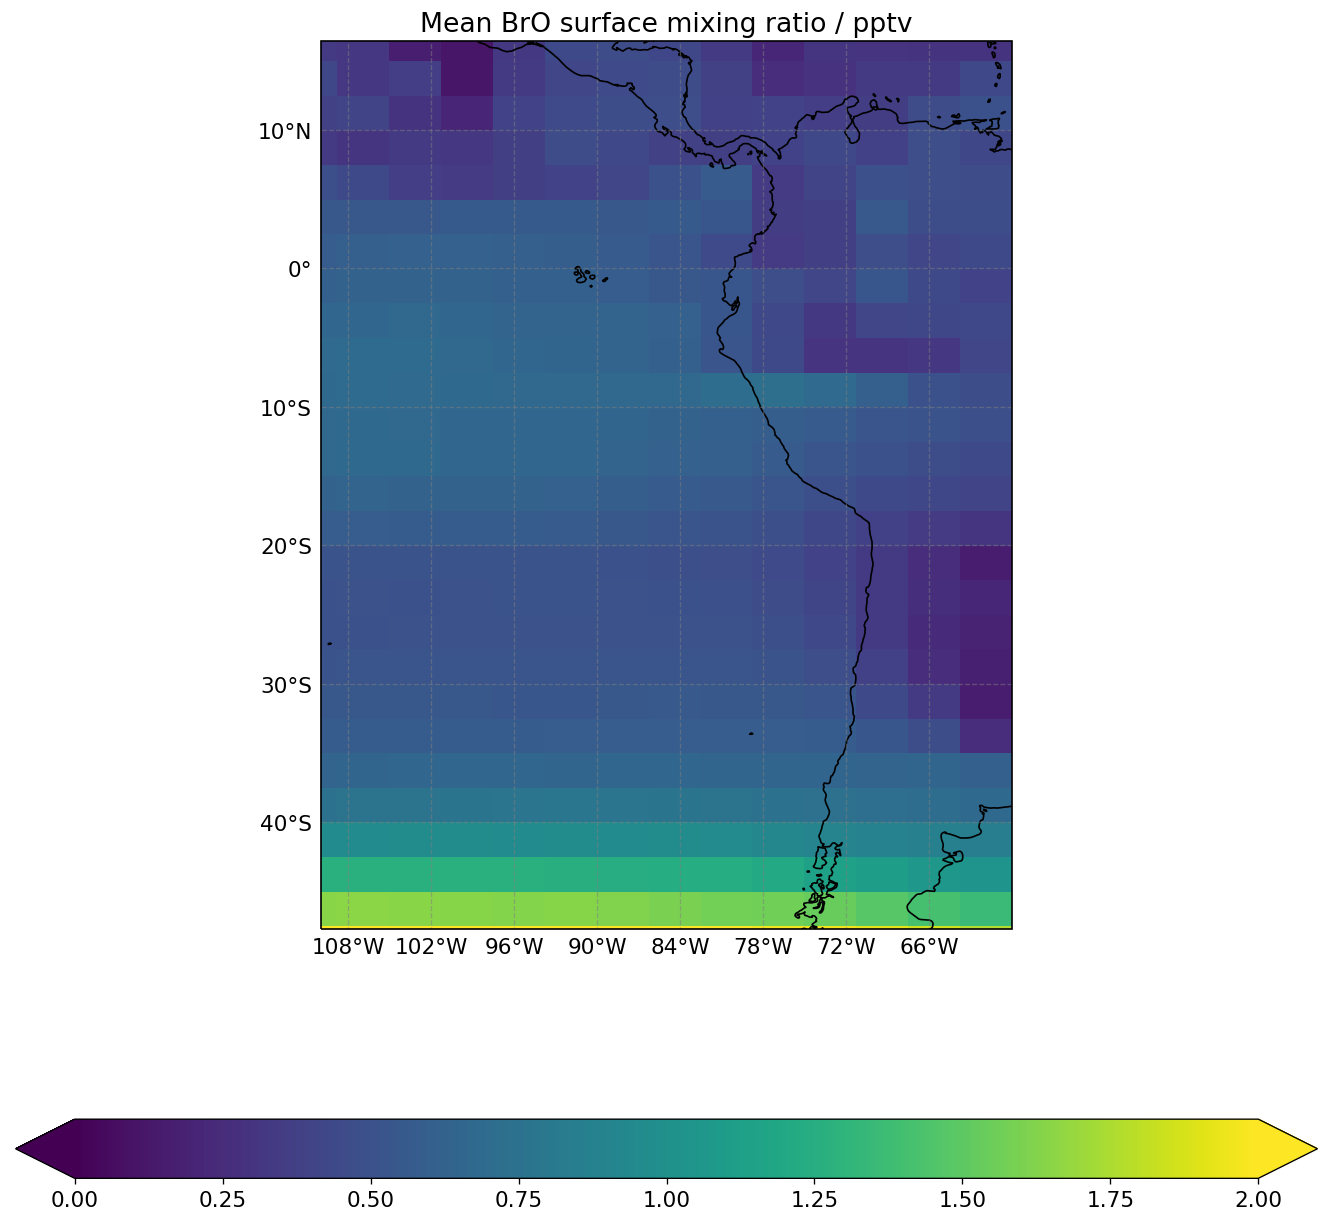

In [88]:
LAND = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])


lats=data[0].coord('latitude').points
lons=data[0].coord('longitude').points
hts=data[0].coord('level_height').points
#bry.data,lons = shiftgrid(180., bry.data, lons, start=False)

plt.clf()

bbox=[lon_range[0], lon_range[1], lat_range[0], lat_range[1]]
x,y = lons,lats
fig, ax = make_map(bbox=bbox)
cs = ax.pcolormesh(x, y, np.mean(bro.data[:,0:10,:,:], axis=(0,1))*mrair/mrbro/1e-12, vmin=0, vmax=2.,cmap='viridis')
plt.title('Mean BrO mixing ratio at the surface')
cbar = fig.colorbar(cs, orientation='horizontal', shrink=1., extend='both')
plt.title('Mean BrO surface mixing ratio / pptv', fontsize=16)
plt.show()

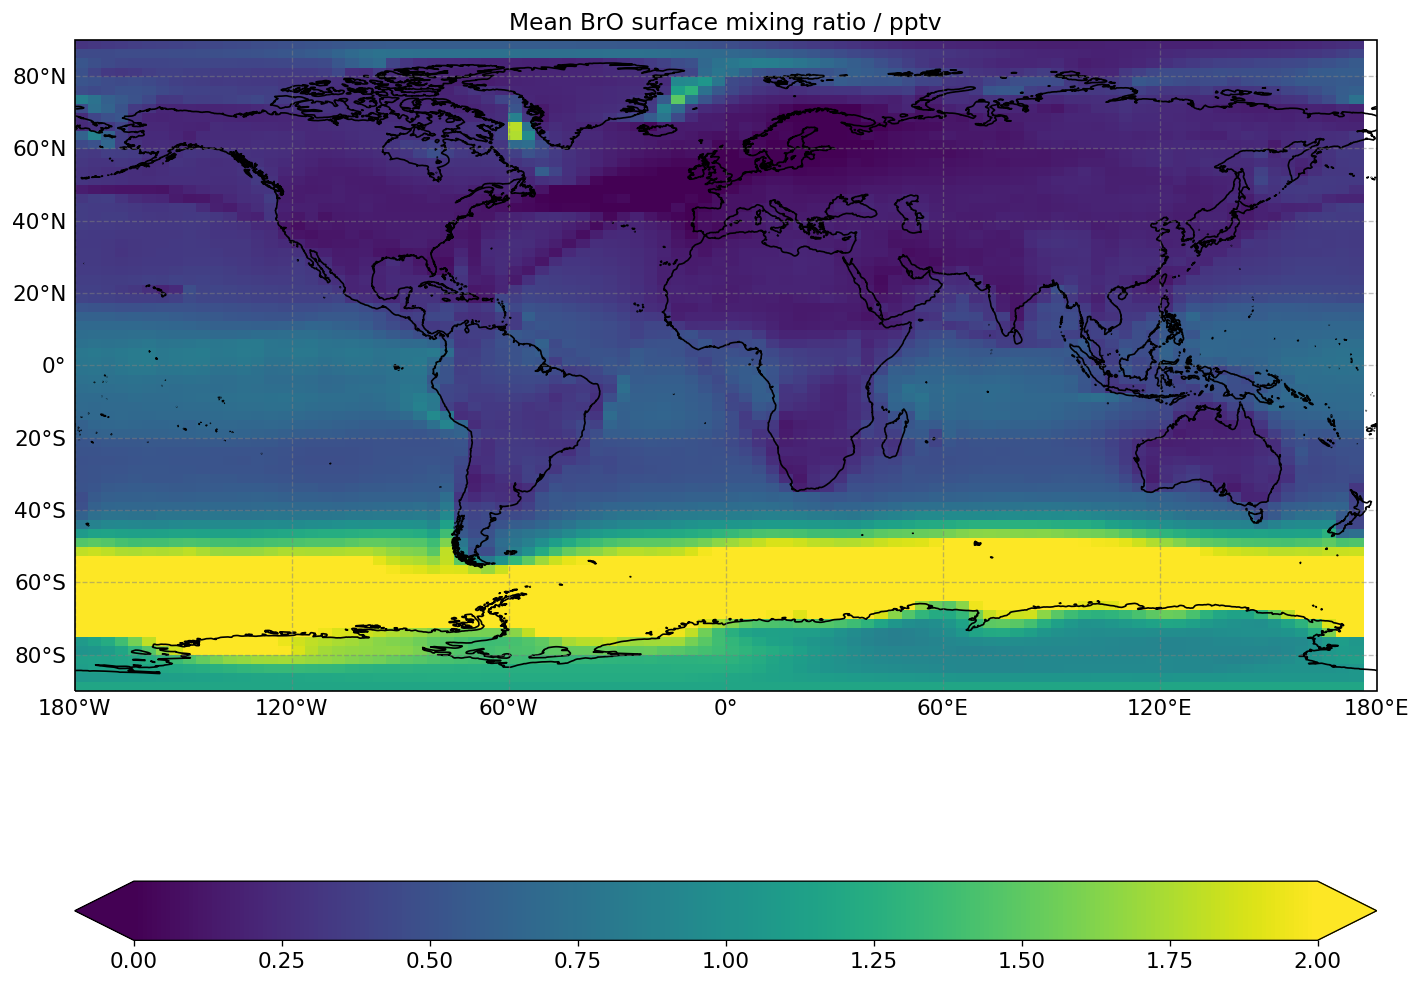

In [86]:
LAND = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])


lats=data[0].coord('latitude').points
lons=data[0].coord('longitude').points
#hts=data[0].coord('Hybrid height').points
bro.data,lons = shiftgrid(180., bro.data, lons, start=False)

plt.clf()

bbox=[-180, 180, -90, 90]
x,y = lons,lats
fig, ax = make_map(bbox=bbox)
cs = ax.pcolormesh(x, y, np.mean(bro.data[:,0:10,:,:],axis=(0,1))*mrair/mrbro/1e-12,vmin=0., vmax=2,cmap='viridis')
cbar = fig.colorbar(cs, orientation='horizontal', shrink=1., extend='both')
plt.title('Mean BrO surface mixing ratio / pptv', fontsize=14)
plt.show()